In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

[[-0.24688832 -0.02372817 -0.00109843  0.00035105 -0.00259133]]
[[1.15777942e+03 0.00000000e+00 6.67111050e+02]
 [0.00000000e+00 1.15282305e+03 3.86129068e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


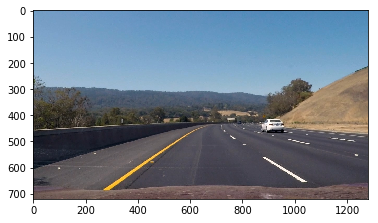

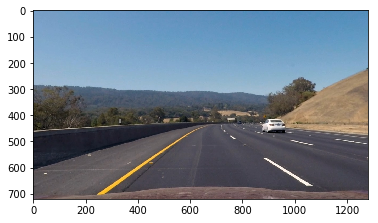

In [77]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

src_pts = np.float32([[250, 690], [610, 440], [670, 440], [1060, 690]])
camera_values = pickle.load(open('camera_values.p', 'rb'))
mtx, dist = camera_values['mtx'], camera_values['dist']
img = cv2.cvtColor(cv2.imread('test_images/test3.jpg'), cv2.COLOR_BGR2RGB)
img_undistort = cv2.undistort ( img, mtx, dist, None, mtx)

plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(img_undistort)


print(dist)
print(mtx)

In [86]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image = img_undistort

# Edit this function to create your own pipeline.
def pipeline(img, s_thresh=(170, 255), sx_thresh=(20, 100), l_thresh=(100, 200)):
    img = np.copy(img)
    # Convert to HLS color space and separate the V channel
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    # Sobel x
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    sobely = cv2.Sobel(l_channel, cv2.CV_64F, 0, 1) # Take the derivative in x
    abs_sobely = np.absolute(sobely)
    abs_sobel = np.sqrt(0.8*np.square(sobelx) + 0.2*np.square(sobely))
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    s_binary[(l_channel < l_thresh[0]) | (l_channel > l_thresh[1])] = 0
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
    return color_binary
 
def plot(image, result):
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(image)
    ax1.set_title('Original Image', fontsize=40)

    ax2.imshow(result)
    ax2.set_title('Pipeline Result', fontsize=40)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#     cv2.imwrite('threshold_input.png', image)
#     cv2.imwrite('threshold_result.png', result_binary)




<Figure size 432x288 with 0 Axes>

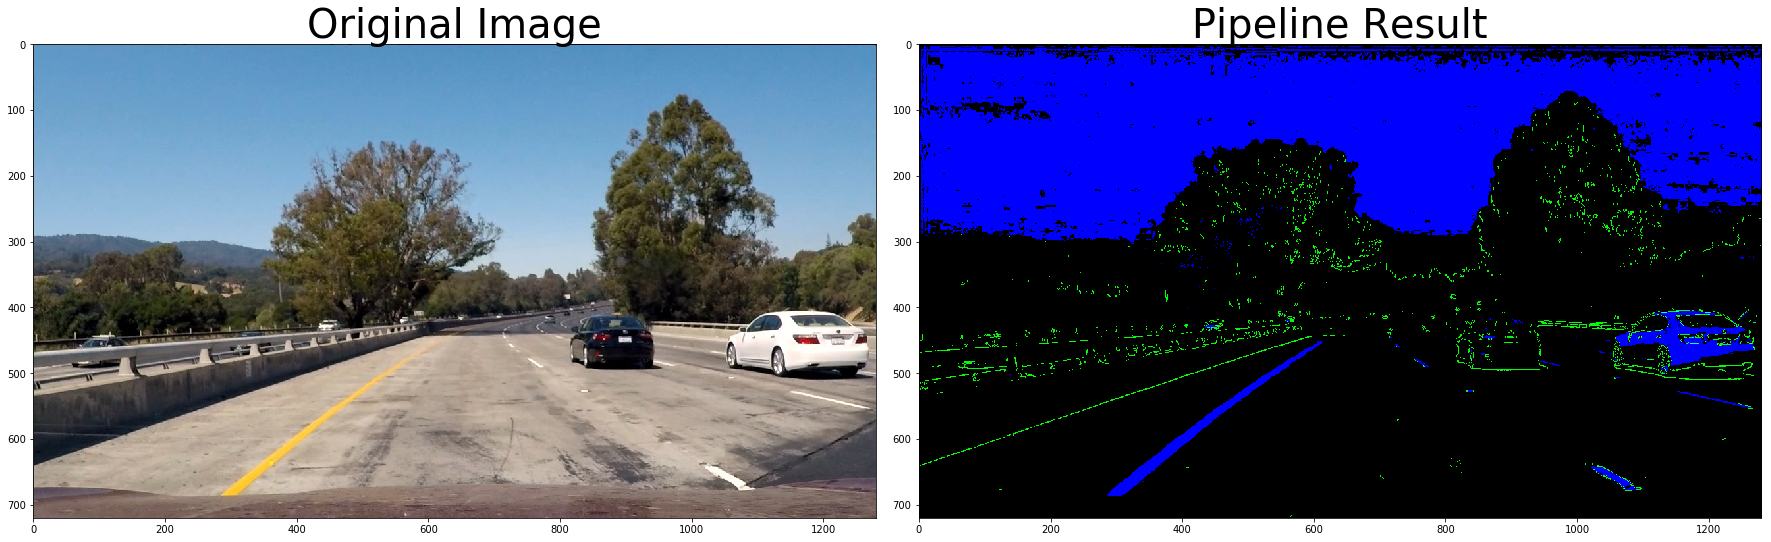

<Figure size 432x288 with 0 Axes>

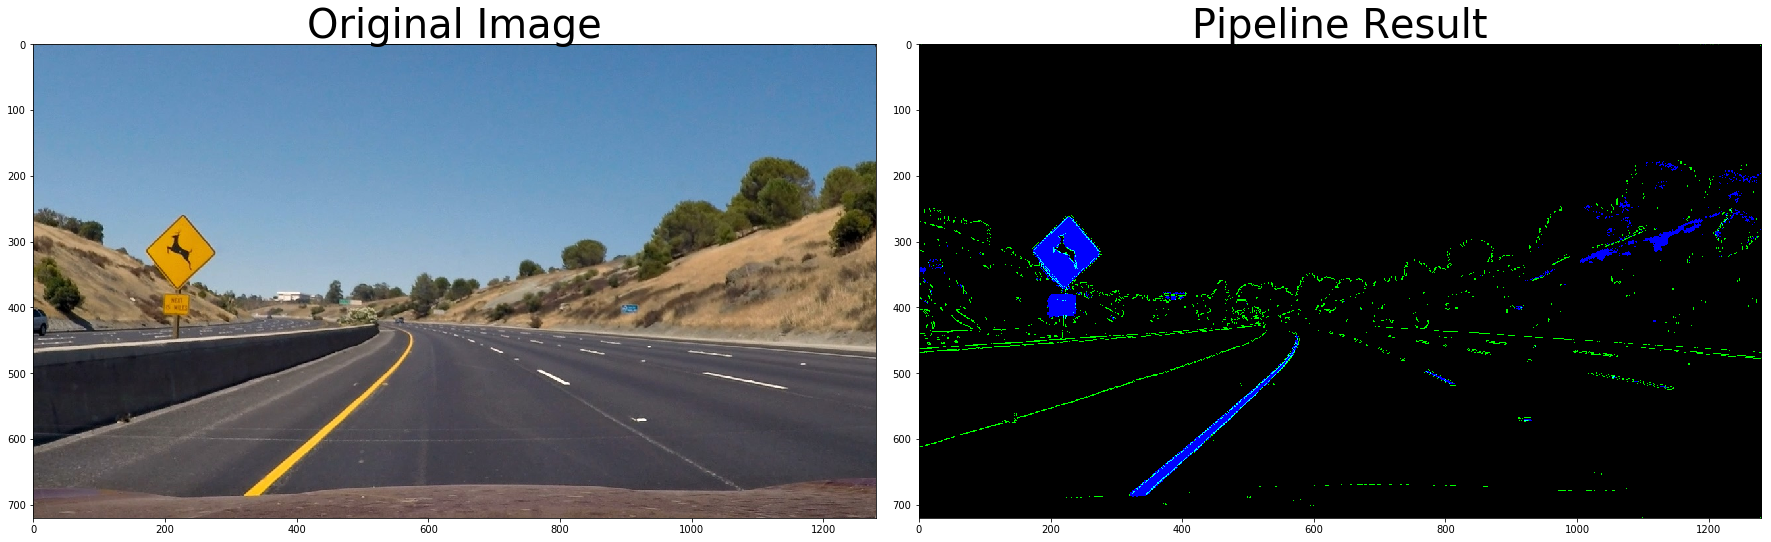

<Figure size 432x288 with 0 Axes>

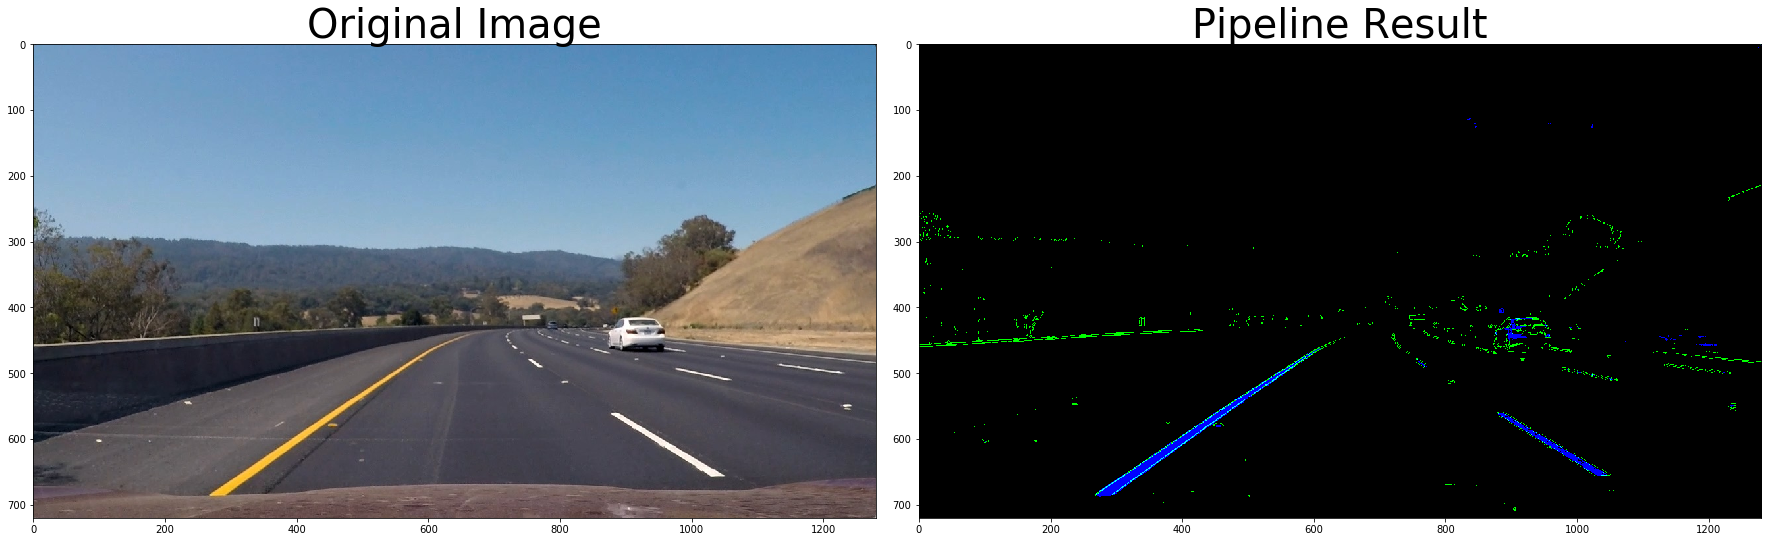

<Figure size 432x288 with 0 Axes>

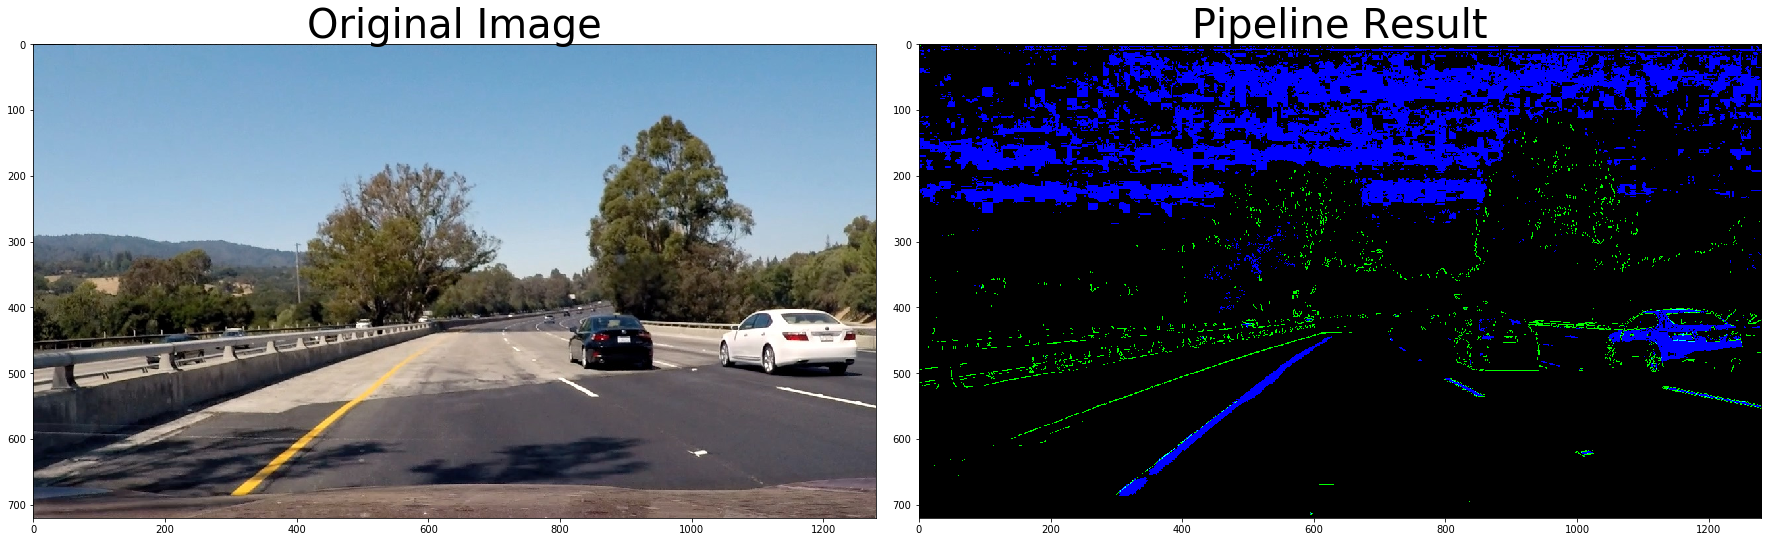

<Figure size 432x288 with 0 Axes>

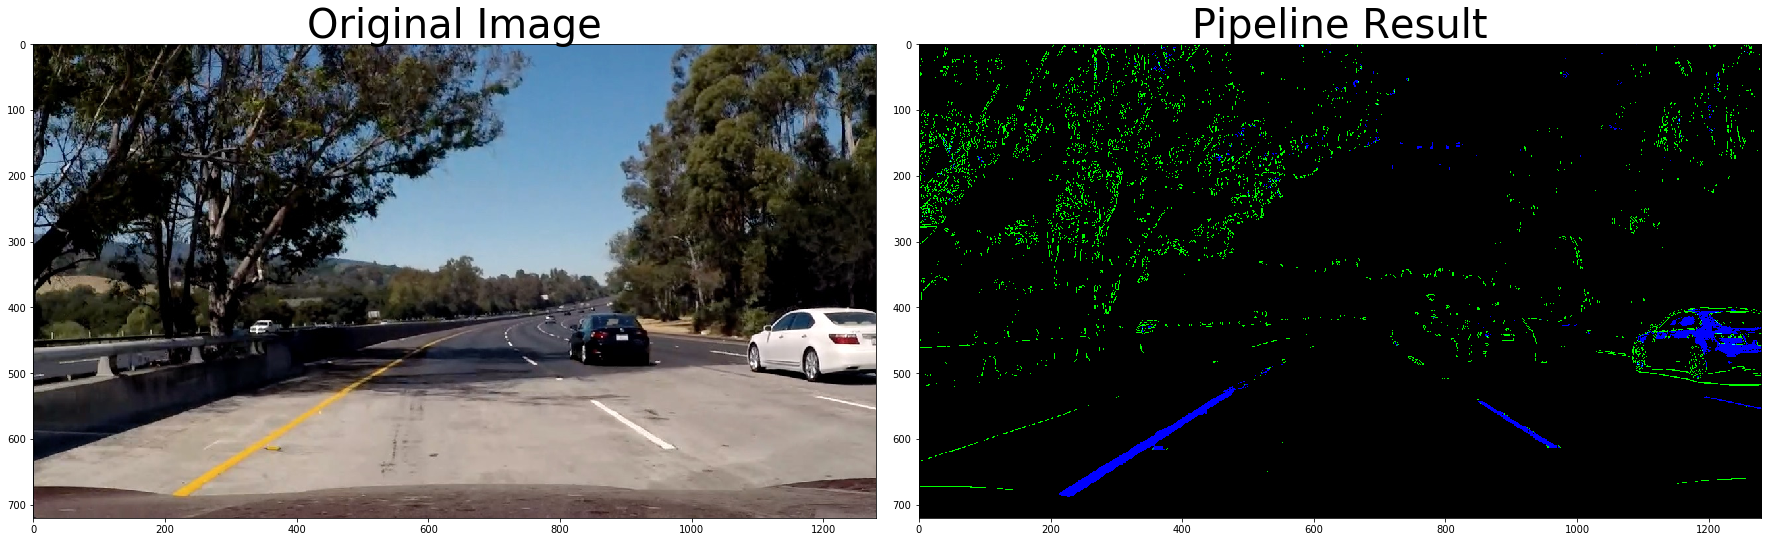

<Figure size 432x288 with 0 Axes>

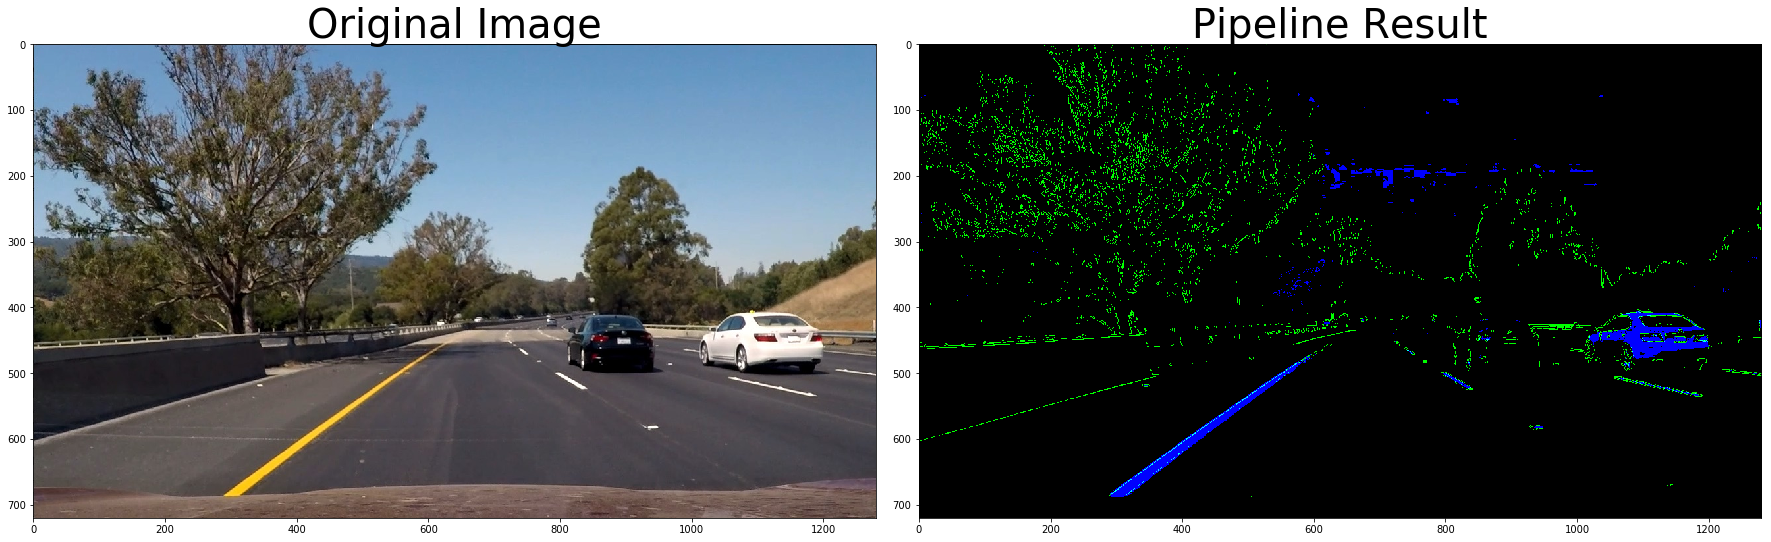

In [91]:
import os

out_dir = 'thresholded_images'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)


for i in range(1, 7):
    img = cv2.cvtColor(cv2.imread("test_images/test%d.jpg" % i), cv2.COLOR_BGR2RGB)
    result = pipeline(img , s_thresh=(120, 255), sx_thresh=(60, 100), l_thresh=(50, 255))
    plt.figure()
    plot(img, result)
    result_binary = np.max(result, axis=2)
    cv2.imwrite(os.path.join(out_dir, 'result_%d.png' % i), result_binary)
    cv2.imwrite(os.path.join(out_dir, 'input_%d.png' % i), img)
    